In [23]:
# Initial imports
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
file_path = "crypto_data.csv"
df = pd.read_csv(file_path)

In [3]:
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [4]:
df1 = df.loc[df['IsTrading'] == True]
df1

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [5]:
df2 = df1.dropna()
df2

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,True,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [6]:
df3 = df2.loc[df['TotalCoinsMined'] > 0]
df3

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
...,...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,True,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [8]:
df4 = df3.drop(['CoinName'], axis=1)
df4

,Unnamed: 0,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,Scrypt,True,PoW/PoS,1.055185e+09,532000000
5,1337,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethash,True,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,SHA-256,True,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,True,PoW,7.296538e+06,21000000


In [10]:
df5 = df4.drop(['Unnamed: 0'], axis=1)
df5

,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,True,PoW/PoS,4.199995e+01,42
2,Scrypt,True,PoW/PoS,1.055185e+09,532000000
5,X13,True,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,True,PoW,1.792718e+07,21000000
8,Ethash,True,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,SHA-256,True,DPoS,2.000000e+09,2000000000
1242,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,Equihash,True,PoW,7.296538e+06,21000000


In [11]:
df6 = df5.drop(['IsTrading'], axis=1)
df6

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [22]:
df7 = pd.get_dummies(df6, columns = ['Algorithm', 'ProofType']\
                     ,prefix='Algorithm',drop_first=True)
df7

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,Algorithm_PoW/PoS,Algorithm_PoW/PoS,Algorithm_PoW/PoW,Algorithm_PoW/nPoS,Algorithm_Pos,Algorithm_Proof of Authority,Algorithm_Proof of Trust,Algorithm_TPoS,Algorithm_Zero-Knowledge Proof,Algorithm_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Using PCA

In [26]:
# Standarize data with StandarScaler
crypto_scaled = StandardScaler().fit_transform(df7)


In [30]:
# Applying PCA to reduce dimensions from 4 to 2

# Initialize PCA model
pca = PCA(n_components=0.99)

# Get two principal components for the iris data.
crypto_pca = pca.fit_transform(crypto_scaled)

In [33]:
# Transform PCA data to a DataFrame
# df_crypto_pca = pd.DataFrame(
#     data=crypto_pca, columns=["principal component 1", "principal component 2", "principal component 3"]
)
# df_crypto_pca.head()

SyntaxError: invalid syntax (<ipython-input-33-ecdcf9a03b6a>, line 4)

In [31]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.02851314, 0.02183228, 0.02093007, 0.02087258, 0.02087257,
       0.02087257, 0.02085124, 0.01910435, 0.0179288 , 0.01777379,
       0.01662938, 0.01629408, 0.01583495, 0.01464966, 0.0134856 ,
       0.01262337, 0.01231377, 0.01127287, 0.01093674, 0.01070932,
       0.01062572, 0.01060732, 0.01059359, 0.0105697 , 0.01055562,
       0.01051051, 0.01049655, 0.01049558, 0.01049558, 0.01049558,
       0.01049381, 0.01048438, 0.01047714, 0.01047581, 0.01047329,
       0.01047115, 0.01046928, 0.01046411, 0.01046265, 0.01045618,
       0.01045597, 0.01045597, 0.01045525, 0.01045351, 0.01044982,
       0.01044805, 0.0104431 , 0.01043743, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043

## Running KMeans with PCA Data

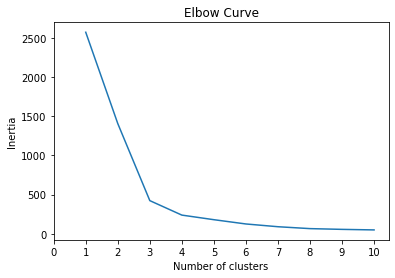

In [34]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()